# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
### <span style='font-family:"Times New Roman"'>This code detects Blobs using spatial averaging and thresholding. 

# <span style='font-family:"Times New Roman"'> Loading required modules:

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
from scipy import ndimage
from sklearn.preprocessing import Binarizer
import scipy.ndimage.filters
from scipy.stats import norm

# <span style='font-family:"Times New Roman"'> Reading image:

In [2]:
I = mpimg.imread('hickson-compact-group.tif')

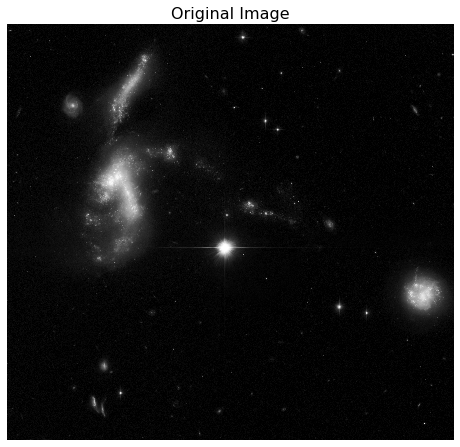

In [3]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(I,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.show()

### <span style='font-family:"Times New Roman"'> Using Gaussian Filter with sigma = 25 and window size of six sigma for blurring the image:

In [4]:
I_Gauss = ndimage.filters.gaussian_filter(I, 25, truncate=6)

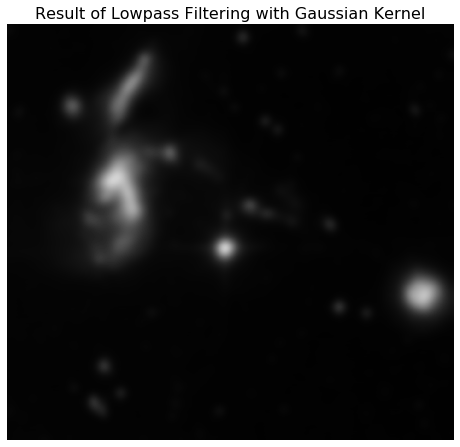

In [5]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(I_Gauss,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Result of Lowpass Filtering with Gaussian Kernel', fontsize = 16)
plt.axis('off')
plt.show()

### <span style='font-family:"Times New Roman"'> Thresholding with 0.4

In [6]:
I_trsh = Binarizer(102.4)

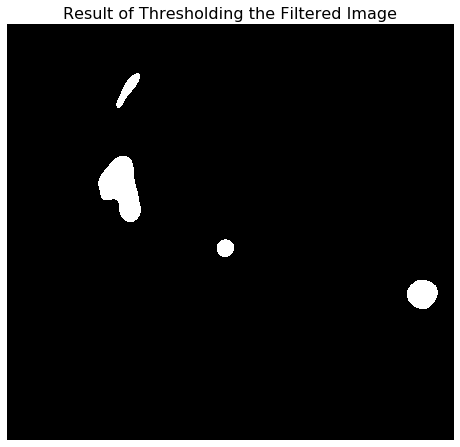

In [7]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(I_trsh.transform(I_Gauss),cmap='gray')
plt.title('Result of Thresholding the Filtered Image', fontsize = 16)
plt.axis('off')
plt.show()

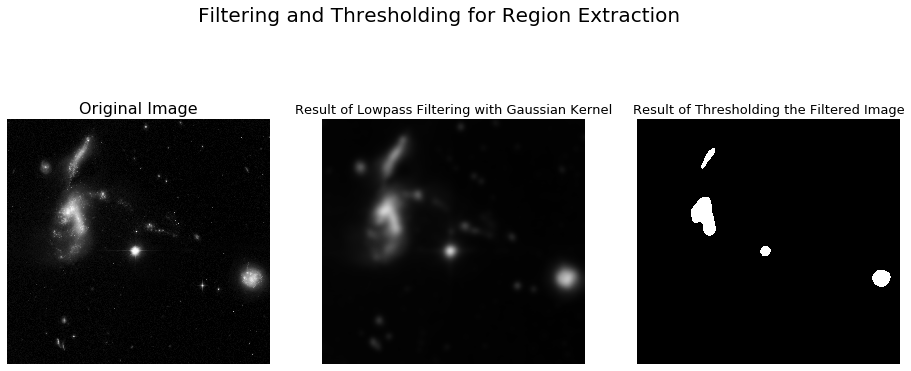

In [8]:
fig = plt.figure(figsize=(16, 12))
plt.subplot(2, 3, 1)
img=plt.imshow(I,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 3, 2)
img=plt.imshow(I_Gauss,cmap='gray',vmin=np.iinfo(np.uint8).min,vmax=np.iinfo(np.uint8).max)
plt.title('Result of Lowpass Filtering with Gaussian Kernel', fontsize = 13)
plt.axis('off')
plt.subplot(2, 3, 3)
img=plt.imshow(I_trsh.transform(I_Gauss),cmap='gray')
plt.title('Result of Thresholding the Filtered Image', fontsize = 13)
plt.axis('off')
fig.suptitle('Filtering and Thresholding for Region Extraction', fontsize = 20)
plt.show()

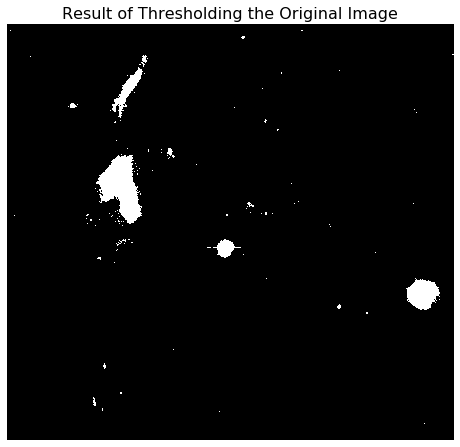

In [9]:
fig = plt.figure(figsize=(8, 8))
img=plt.imshow(I_trsh.transform(I),cmap='gray')
plt.title('Result of Thresholding the Original Image', fontsize = 16)
plt.axis('off')
plt.show()

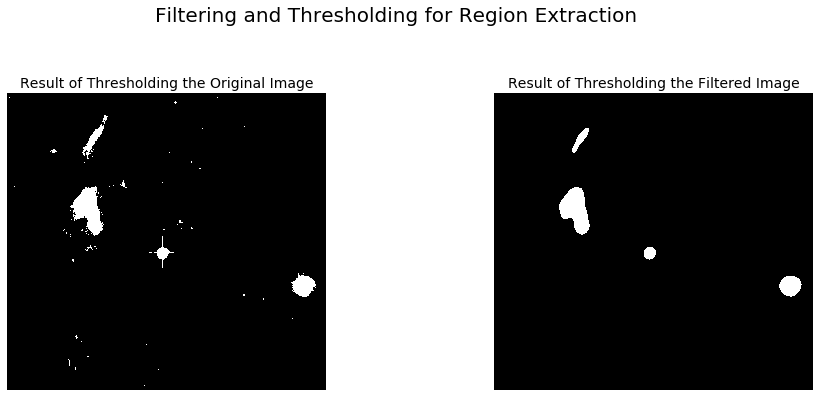

In [10]:
fig = plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
img=plt.imshow(I_trsh.transform(I),cmap='gray')
plt.title('Result of Thresholding the Original Image', fontsize = 14)
plt.axis('off')
plt.subplot(2, 2, 2)
img=plt.imshow(I_trsh.transform(I_Gauss),cmap='gray')
plt.title('Result of Thresholding the Filtered Image', fontsize = 14)
plt.axis('off')
fig.suptitle('Filtering and Thresholding for Region Extraction', fontsize = 20)
plt.show()

<span style='font-family:"Times New Roman"'> When blurring an image, in boundaries of pixels, the intensity values differ from original image. In boundaries, the intensity difference make ramp like change. As a result, when binarizing original image, the sudden intensity changes in small area (in this problem white pixels) of pixels are going to reflect in binarized version. But in blurred images, the intensity of small size area (in this problem white pixels) are different than original image and by binarizing them, they will reflect as a black pixels. However, the thresholding limit is affecting the procedure too. If different thresholding limit is to use, the result would be different. So, blurring helps to remove the small size white pixels in binarized image.  